In [ ]:
!pip install -r "/content/drive/MyDrive/Colab Notebooks/LEVX_1km/requirements.txt"

In [ ]:
!pip install lazypredict

In [3]:
import plotly.express as px
import pandas as pd
import numpy as np
coor = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEPP/input_files/distan_lat42.77lon-1.647p3R12Km.csv")
px.set_mapbox_access_token("pk.eyJ1IjoiZ3JhbmFudHVpbiIsImEiOiJja3B4dGU4OTkwMTFmMm9ycnNhMjJvaGJqIn0.VWzx_PkD9A5cSUVsn_ijCA")
px.scatter_mapbox(coor, hover_data=['distance'],lat='lat', lon='lon',color='distance', title="Nearest points",
                           color_continuous_scale=px.colors.cyclical.IceFire,)

In [4]:
station = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEPP/input_files/LEPP2018.csv",
                          usecols =["time","wxcodes_o"],
                          parse_dates=["time"]).dropna().set_index("time")

pd.options.display.max_rows = 999
print("Weather frequencies\n")
station["wxcodes_o"].value_counts(normalize=True).map(lambda n: '{:.2%}'.format(n))

Weather frequencies



M                 85.30%
-RA                5.22%
BR                 1.67%
FG                 1.38%
RA                 0.97%
BCFG               0.61%
-RA BR             0.36%
VCFG               0.32%
BR BCFG            0.31%
FZFG               0.27%
VCTS               0.25%
TS                 0.24%
RA BR              0.23%
-SHRA              0.23%
-TSRA              0.21%
-SN                0.21%
-DZ                0.20%
-UP                0.20%
SHRA               0.18%
SN                 0.16%
TSRA               0.10%
VCSH               0.07%
-DZ BR             0.07%
BCFG BR            0.07%
TS SHRA            0.06%
+RA                0.06%
-SNRA              0.06%
UP                 0.06%
TS -SHRA           0.05%
RASN               0.05%
SN FZFG            0.05%
+SHRA              0.04%
BR -RA             0.04%
-RA FG             0.04%
BR VCFG            0.03%
-SN FZFG           0.03%
-FZUP BR           0.03%
VCTS -SHRA         0.03%
DZ                 0.03%
-UP BR             0.03%


In [5]:
#label br/fg if weather code contains FG or BR

station["brfg_l"] = "No BR/FG"
mask = station['wxcodes_o'].str.contains("BR")
station.loc[mask,["brfg_l"]] = "BR/FG"
mask = station['wxcodes_o'].str.contains("FG")
station.loc[mask,["brfg_l"]] = "BR/FG"
pd.options.display.max_rows = 999

print(station.sample(50))
print("*****************************")
station["brfg_l"].value_counts(normalize=True).transform(lambda x: '{:,.0%}'.format(x))

                    wxcodes_o    brfg_l
time                                   
2018-12-02 05:00:00         M  No BR/FG
2018-09-01 19:00:00         M  No BR/FG
2018-01-16 22:30:00         M  No BR/FG
2018-04-20 12:30:00         M  No BR/FG
2018-07-16 06:00:00         M  No BR/FG
2018-09-24 08:00:00         M  No BR/FG
2018-06-20 18:30:00         M  No BR/FG
2018-11-29 02:00:00         M  No BR/FG
2018-08-28 15:00:00         M  No BR/FG
2018-02-20 11:00:00         M  No BR/FG
2018-10-28 17:30:00         M  No BR/FG
2018-08-07 03:30:00         M  No BR/FG
2018-06-01 20:00:00         M  No BR/FG
2018-04-23 00:00:00         M  No BR/FG
2018-06-15 07:00:00         M  No BR/FG
2018-09-27 09:30:00         M  No BR/FG
2018-02-04 05:30:00         M  No BR/FG
2018-12-11 21:00:00         M  No BR/FG
2018-06-17 13:30:00         M  No BR/FG
2018-11-02 15:00:00         M  No BR/FG
2018-03-09 12:30:00         M  No BR/FG
2018-08-26 04:00:00         M  No BR/FG
2018-11-26 12:30:00       -RA  No BR/FG


No BR/FG    94%
BR/FG        6%
Name: brfg_l, dtype: object

**Forecast D1**

In [6]:
#Forecast d1
model1k = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEPP/input_files/lat42.77lon-1.647p3R12KmD1.csv",parse_dates=["time"]).set_index("time")

model1k

,Unnamed: 0,dir0,snow_prec0,snowlevel0,mod0,wind_gust0,mslp0,temp0,rh0,visibility0,...,cape2,cin2,cfh2,cfl2,cfm2,cft2,HGT5002,HGT8502,T5002,T8502
time,,,,,,,,,,,,,,,,,,,,,
2018-01-02 00:00:00,0,212.810684,0.0,1204.263184,2.763654,9.542564,102839.890625,281.275116,0.947388,22412.476562,...,0.00,0.000469,0.00000,0.468750,0.093750,0.468750,5607.215820,1578.078003,252.732269,275.716339
2018-01-02 01:00:00,1,219.902222,0.0,1239.573364,2.314501,3.172857,102786.210938,281.294525,0.942502,24212.171875,...,0.00,-0.003242,0.00000,0.445312,0.054688,0.445312,5612.247070,1574.463013,253.178864,275.794250
2018-01-02 02:00:00,2,207.281235,0.0,1272.054932,2.600275,3.666056,102732.492188,280.760559,0.957805,16212.355469,...,0.00,0.003242,0.00000,0.585938,0.484375,0.585938,5611.367188,1570.259033,253.765778,275.807709
2018-01-02 03:00:00,3,192.515350,0.0,1294.618164,2.184818,3.098562,102700.179688,280.855927,0.977439,16412.923828,...,0.00,-0.003906,0.34375,0.640625,0.585938,0.640625,5613.012207,1569.241943,253.932220,276.248291
2018-01-02 04:00:00,4,191.211334,0.0,1286.428467,3.427353,4.461230,102694.937500,281.143433,0.951643,24214.121094,...,1.95,-9.202851,0.00000,0.266460,0.289062,0.289062,5614.570801,1565.439941,254.208084,275.869568
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-01 19:00:00,8731,344.859467,0.0,1728.522583,7.440048,11.918997,103544.250000,278.996826,0.968763,24035.839844,...,0.00,0.001641,0.00000,0.156830,0.000000,0.156830,5743.180176,1633.011963,255.708374,282.949585
2019-01-01 20:00:00,8732,345.285889,0.0,1709.658203,7.653408,12.149794,103542.710938,278.911560,0.955455,24037.287109,...,0.00,-0.003359,0.00000,0.028191,0.000000,0.028191,5742.202148,1632.599976,255.604370,282.798309
2019-01-01 21:00:00,8733,344.544983,0.0,1704.850708,7.664435,12.332341,103549.656250,278.855560,0.945516,24037.503906,...,0.00,-0.001055,0.00000,0.000000,0.000000,0.000000,5741.512207,1633.116943,255.559067,282.708557


In [7]:
#concat station file versus meteorological model file same time
df_all1k = pd.concat([station,model1k],axis=1).drop(columns=["wxcodes_o","Unnamed: 0"]).dropna()
df_all1k

,brfg_l,dir0,snow_prec0,snowlevel0,mod0,wind_gust0,mslp0,temp0,rh0,visibility0,...,cape2,cin2,cfh2,cfl2,cfm2,cft2,HGT5002,HGT8502,T5002,T8502
time,,,,,,,,,,,,,,,,,,,,,
2018-01-02 00:00:00,No BR/FG,212.810684,0.0,1204.263184,2.763654,9.542564,102839.890625,281.275116,0.947388,22412.476562,...,0.00,0.000469,0.000000,0.468750,0.093750,0.468750,5607.215820,1578.078003,252.732269,275.716339
2018-01-02 01:00:00,No BR/FG,219.902222,0.0,1239.573364,2.314501,3.172857,102786.210938,281.294525,0.942502,24212.171875,...,0.00,-0.003242,0.000000,0.445312,0.054688,0.445312,5612.247070,1574.463013,253.178864,275.794250
2018-01-02 02:00:00,No BR/FG,207.281235,0.0,1272.054932,2.600275,3.666056,102732.492188,280.760559,0.957805,16212.355469,...,0.00,0.003242,0.000000,0.585938,0.484375,0.585938,5611.367188,1570.259033,253.765778,275.807709
2018-01-02 03:00:00,No BR/FG,192.515350,0.0,1294.618164,2.184818,3.098562,102700.179688,280.855927,0.977439,16412.923828,...,0.00,-0.003906,0.343750,0.640625,0.585938,0.640625,5613.012207,1569.241943,253.932220,276.248291
2018-01-02 04:00:00,No BR/FG,191.211334,0.0,1286.428467,3.427353,4.461230,102694.937500,281.143433,0.951643,24214.121094,...,1.95,-9.202851,0.000000,0.266460,0.289062,0.289062,5614.570801,1565.439941,254.208084,275.869568
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-30 19:00:00,No BR/FG,349.103638,0.0,1798.181885,6.382390,9.346894,103399.609375,279.453674,0.768635,24039.595703,...,0.00,-0.000625,0.000000,0.000000,0.000000,0.000000,5724.754883,1637.458008,253.731430,284.070923
2018-12-30 20:00:00,No BR/FG,347.016388,0.0,1807.223267,6.024676,7.574009,103369.320312,279.441376,0.774162,24040.613281,...,0.00,0.000742,0.000000,0.000000,0.000000,0.000000,5724.288086,1635.755005,253.731628,284.076691
2018-12-30 21:00:00,No BR/FG,348.243347,0.0,1807.652100,6.441942,9.536459,103380.078125,279.481567,0.768679,24042.025391,...,0.00,0.000937,0.000000,0.000000,0.000000,0.000000,5723.713867,1635.202026,253.642181,284.166443


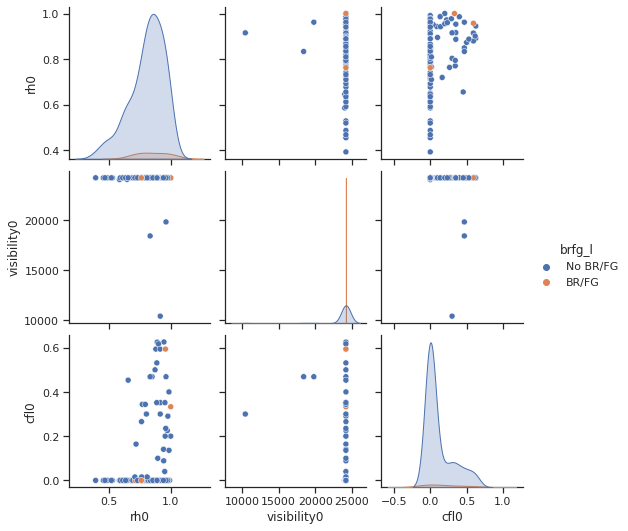

In [8]:
import seaborn as sns
sns.set_theme(style="ticks")

sns.pairplot(df_all1k[["brfg_l","rh0","visibility0","cfl0"]].sample(100), hue="brfg_l");

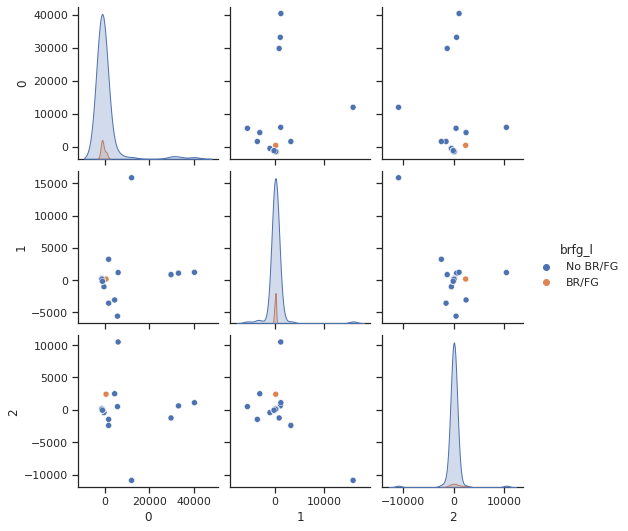

In [9]:
from sklearn.decomposition import PCA

df_pca = pd.DataFrame(PCA(n_components=3).fit_transform(df_all1k.iloc[:,1:]),
                                                        index =df_all1k.index)
df_pca["brfg_l"] = df_all1k.brfg_l
sns.pairplot(df_pca.sample(100), hue="brfg_l");

In [10]:
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyClassifier

# X and Y
Y = df_all1k.brfg_l
X = df_all1k.iloc[:,1:]

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, )


multiple_model = LazyClassifier(verbose =0, ignore_warnings = True,predictions=True)
models,predictions = multiple_model.fit(X_train,X_test,y_train,y_test)


100%|██████████| 29/29 [00:32<00:00,  1.14s/it]


In [11]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
QuadraticDiscriminantAnalysis,0.81,0.84,None,0.86,0.23
NearestCentroid,0.70,0.78,None,0.79,0.14
LabelPropagation,0.94,0.75,None,0.94,2.36
LabelSpreading,0.94,0.75,None,0.94,3.52
ExtraTreesClassifier,0.97,0.75,None,0.97,0.91
BernoulliNB,0.70,0.74,None,0.78,0.18
BaggingClassifier,0.96,0.74,None,0.96,4.33
DecisionTreeClassifier,0.95,0.73,None,0.95,0.66
LGBMClassifier,0.97,0.73,None,0.97,1.69


**Meteorological model independent variables X**

In [12]:
df_all1k.iloc[:,1:].columns

Index(['dir0', 'snow_prec0', 'snowlevel0', 'mod0', 'wind_gust0', 'mslp0',
       'temp0', 'rh0', 'visibility0', 'lhflx0', 'lwflx0', 'conv_prec0',
       'prec0', 'swflx0', 'shflx0', 'cape0', 'cin0', 'cfh0', 'cfl0', 'cfm0',
       'cft0', 'HGT5000', 'HGT8500', 'T5000', 'T8500', 'dir1', 'snow_prec1',
       'snowlevel1', 'mod1', 'wind_gust1', 'mslp1', 'temp1', 'rh1',
       'visibility1', 'lhflx1', 'lwflx1', 'conv_prec1', 'prec1', 'swflx1',
       'shflx1', 'cape1', 'cin1', 'cfh1', 'cfl1', 'cfm1', 'cft1', 'HGT5001',
       'HGT8501', 'T5001', 'T8501', 'dir2', 'snow_prec2', 'snowlevel2', 'mod2',
       'wind_gust2', 'mslp2', 'temp2', 'rh2', 'visibility2', 'lhflx2',
       'lwflx2', 'conv_prec2', 'prec2', 'swflx2', 'shflx2', 'cape2', 'cin2',
       'cfh2', 'cfl2', 'cfm2', 'cft2', 'HGT5002', 'HGT8502', 'T5002', 'T8502'],
      dtype='object')

**ML LGBMClassifier. Samples 10. Heidke Skill score. Significance level (alpha) = 0.01 for normality test of HSS samples**


Confusion matrix (Machine Learning)

col_0     BR/FG  No BR/FG   All
brfg_l                         
BR/FG        57        27    84
No BR/FG     29      1616  1645
All          86      1643  1729
Heidke Skill Score: 0.65

Quality report (Machine Learning)

              precision  recall  f1-score  support
BR/FG              0.66    0.68      0.67    84.00
No BR/FG           0.98    0.98      0.98  1645.00
accuracy           0.97    0.97      0.97     0.97
macro avg          0.82    0.83      0.83  1729.00
weighted avg       0.97    0.97      0.97  1729.00

Confusion matrix (Machine Learning)

col_0     BR/FG  No BR/FG   All
brfg_l                         
BR/FG        67        23    90
No BR/FG     30      1609  1639
All          97      1632  1729
Heidke Skill Score: 0.7

Quality report (Machine Learning)

              precision  recall  f1-score  support
BR/FG              0.69    0.74      0.72    90.00
No BR/FG           0.99    0.98      0.98  1639.00
accuracy           0.97 

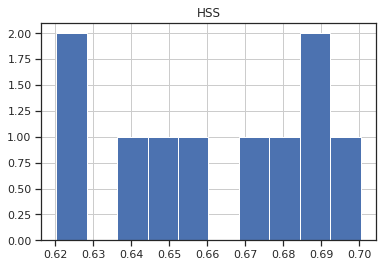

In [13]:
from lightgbm.sklearn import LGBMClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from scipy.stats import shapiro

#random seed 1
np.random.seed(31)

# X and Y
Y = df_all1k.brfg_l
X = df_all1k.iloc[:,1:]

# loop random
HSS = []
for t in range (0,10):

  #split variables
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, )

  # Resample
  X_res, y_res = SMOTE().fit_resample(X_train,y_train)

  #train model
  ml_model = LGBMClassifier(n_estimators=200).fit(X_res,y_res)

  #Confusion matrix
  print("\nConfusion matrix (Machine Learning)\n")

  cm = pd.crosstab(y_test, ml_model.predict(X_test),margins=True,)
  print(cm)
  a = cm.values[0,0]
  b = cm.values[1,0]
  c = cm.values[0,1]
  d = cm.values[1,1]
  HSS.append(2*(a*d-b*c)/((a+c)*(c+d)+(a+b)*(b+d)))
  print("Heidke Skill Score:",round(HSS[t],2))

  #quality report
  print("\nQuality report (Machine Learning)\n")
  print(pd.DataFrame(classification_report(y_test, ml_model.predict(X_test),output_dict=True)).T)

print("\nHSS stadistics")
# if p-value is lower than 5%, we can reject the null hypothesis of the normality of the dataset

print(pd.DataFrame(HSS,columns=["HSS"]).describe())

#sample less 5000
sta, p = shapiro(HSS)
print("\np value:",p)
#significance level alpha=0.01
alpha = 0.01
if p>alpha:
  print("Accept null hypothesis: normal distribution variable HSS in the samples")
else:
  print("Reject null Hypothesis. Alternative hypothesis variable HSS no normal distribution in samples")  

pd.DataFrame(HSS,columns=["HSS"]).hist();

**Add time features**

In [14]:
df_all1k["hour"] = df_all1k.index.hour
df_all1k["month"] = df_all1k.index.month
df_all1k["dayofyear"] = df_all1k.index.dayofyear
df_all1k["weekofyear"] = df_all1k.index.isocalendar().week.astype(int) 

In [15]:
df_all1k.iloc[:,1:].columns

Index(['dir0', 'snow_prec0', 'snowlevel0', 'mod0', 'wind_gust0', 'mslp0',
       'temp0', 'rh0', 'visibility0', 'lhflx0', 'lwflx0', 'conv_prec0',
       'prec0', 'swflx0', 'shflx0', 'cape0', 'cin0', 'cfh0', 'cfl0', 'cfm0',
       'cft0', 'HGT5000', 'HGT8500', 'T5000', 'T8500', 'dir1', 'snow_prec1',
       'snowlevel1', 'mod1', 'wind_gust1', 'mslp1', 'temp1', 'rh1',
       'visibility1', 'lhflx1', 'lwflx1', 'conv_prec1', 'prec1', 'swflx1',
       'shflx1', 'cape1', 'cin1', 'cfh1', 'cfl1', 'cfm1', 'cft1', 'HGT5001',
       'HGT8501', 'T5001', 'T8501', 'dir2', 'snow_prec2', 'snowlevel2', 'mod2',
       'wind_gust2', 'mslp2', 'temp2', 'rh2', 'visibility2', 'lhflx2',
       'lwflx2', 'conv_prec2', 'prec2', 'swflx2', 'shflx2', 'cape2', 'cin2',
       'cfh2', 'cfl2', 'cfm2', 'cft2', 'HGT5002', 'HGT8502', 'T5002', 'T8502',
       'hour', 'month', 'dayofyear', 'weekofyear'],
      dtype='object')

In [16]:
# X and Y
Y = df_all1k.brfg_l
X = df_all1k.iloc[:,1:]

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, )

multiple_model = LazyClassifier(verbose =0, ignore_warnings = True,predictions=True)
models,predictions = multiple_model.fit(X_train,X_test,y_train,y_test)
models

100%|██████████| 29/29 [00:33<00:00,  1.15s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
QuadraticDiscriminantAnalysis,0.81,0.86,None,0.86,0.28
ExtraTreesClassifier,0.98,0.82,None,0.98,0.90
LabelPropagation,0.95,0.82,None,0.95,2.37
LabelSpreading,0.95,0.82,None,0.95,3.19
RandomForestClassifier,0.98,0.77,None,0.97,4.06
LGBMClassifier,0.98,0.77,None,0.97,1.90
ExtraTreeClassifier,0.95,0.77,None,0.96,0.07
KNeighborsClassifier,0.97,0.76,None,0.97,0.26
NearestCentroid,0.68,0.76,None,0.77,0.17



Confusion matrix (Machine Learning)

col_0     BR/FG  No BR/FG   All
brfg_l                         
BR/FG        56        28    84
No BR/FG     33      1612  1645
All          89      1640  1729
Heidke Skill Score: 0.63

Quality report (Machine Learning)

              precision  recall  f1-score  support
BR/FG              0.63    0.67      0.65    84.00
No BR/FG           0.98    0.98      0.98  1645.00
accuracy           0.96    0.96      0.96     0.96
macro avg          0.81    0.82      0.81  1729.00
weighted avg       0.97    0.96      0.97  1729.00

Confusion matrix (Machine Learning)

col_0     BR/FG  No BR/FG   All
brfg_l                         
BR/FG        66        24    90
No BR/FG     28      1611  1639
All          94      1635  1729
Heidke Skill Score: 0.7

Quality report (Machine Learning)

              precision  recall  f1-score  support
BR/FG              0.70    0.73      0.72    90.00
No BR/FG           0.99    0.98      0.98  1639.00
accuracy           0.97 

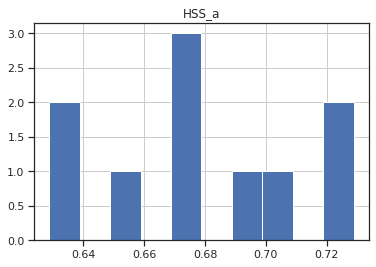

In [17]:
from lightgbm.sklearn import LGBMClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from scipy.stats import shapiro

#random seed 1
np.random.seed(31)

# X and Y
Y = df_all1k.brfg_l
X = df_all1k.iloc[:,1:]

# loop random
HSS_a = []
for t in range (0,10):

  #split variables
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, )

  # Resample
  X_res, y_res = SMOTE().fit_resample(X_train,y_train)

  #train model
  ml_model = LGBMClassifier(n_estimators=200).fit(X_res,y_res)

  #Confusion matrix
  print("\nConfusion matrix (Machine Learning)\n")

  cm = pd.crosstab(y_test, ml_model.predict(X_test),margins=True,)
  print(cm)
  a = cm.values[0,0]
  b = cm.values[1,0]
  c = cm.values[0,1]
  d = cm.values[1,1]
  HSS_a.append(2*(a*d-b*c)/((a+c)*(c+d)+(a+b)*(b+d)))
  print("Heidke Skill Score:",round(HSS_a[t],2))

  #quality report
  print("\nQuality report (Machine Learning)\n")
  print(pd.DataFrame(classification_report(y_test, ml_model.predict(X_test),output_dict=True)).T)

print("\nHSS stadistics")
# if p-value is lower than 1%, we can reject the null hypothesis of the normality of the dataset

print(pd.DataFrame(HSS_a,columns=["HSS"]).describe())

#sample less 5000
sta, p = shapiro(HSS_a)
print("\np value:",p)

#significance level alpha=0.01
alpha = 0.01
if p>alpha:
  print("Accept null Hypothesis: normal distribution variable HSS in the samples")
else:
  print("Reject null Hypothesis. Alternative hypothesis variable HSS no normal distribution in samples")  

pd.DataFrame(HSS_a,columns=["HSS_a"]).hist();

**Test association between observed variable and machine learning forecast (Pearson’s chi square test). Significance level (alpha) = 0.01**

In [18]:
from scipy.stats import chi2_contingency

print("Last confusion matrix\n")
print(cm.iloc[0:2,0:2])

#stadistic(sta), pvalue (p), degrees of freedom (dof) and expected values (exp)
sta, p, dof, exp = chi2_contingency(cm.iloc[0:2,0:2])

#degrees of freedoom (rows-1)*(columns-1) to test associationbetween two variables
alpha = 0.01
print('\np-value:',p)
print('Significance level:',alpha)
print('Degres of of freedom: ',dof)
print("Stadistic",sta)

if p<=alpha:
    print("Reject H0,There is an association between machine learning forecast and observed values")
else:
    print("Retain H0,There is no association between machine learning forecast and observed values")

Last confusion matrix

col_0     BR/FG  No BR/FG
brfg_l                   
BR/FG        54        32
No BR/FG     21      1622

p-value: 7.219661637830993e-161
Significance level: 0.01
Degres of of freedom:  1
Stadistic 730.4308377144622
Reject H0,There is an association between machine learning forecast and observed values


**T test two related samples. This is a test for the null hypothesis that two related samples have identical HSS means. Alternative hypothesis the mean of the distribution underlying the sample without time variables is less than the mean of the distribution underlying the sample with time variables. Significance level (alpha) = 0.01**

In [19]:
from scipy import stats

alpha = 0.01
sta, p_value = stats.ttest_rel(HSS, HSS_a, alternative="less")

print("\nmeans without time variables:", np.round(HSS,2))
print("\nmeans with time variables:", np.round(HSS_a,2))

print("\nalpha: ",alpha)

print("\np_value point: ",p_value)
if p_value < alpha:    
    print("\nwe are rejecting null hypothesis  H0: HHS mean without time variables = HSS mean with time variables")
    print("\nwe are accepting alternative hypothesis: the HSS mean of the sample without time variables inputs is less than the HSS mean of the sample with time variables inputs")
else:
    print("\nwe are accepting null hypothesis:  H0: HSS mean without time variables = HSS mean with time variables ")


means without time variables: [0.65 0.7  0.62 0.68 0.69 0.65 0.67 0.62 0.69 0.64]

means with time variables: [0.63 0.7  0.67 0.73 0.69 0.67 0.67 0.63 0.73 0.65]

alpha:  0.01

p_value point:  0.029317399845645253

we are accepting null hypothesis:  H0: HSS mean without time variables = HSS mean with time variables 


In [20]:
import pickle
from sklearn.pipeline import Pipeline

estimators = [('ml_model', ml_model)]
pipe = Pipeline(estimators)
print(pipe)
al_file={"x_var":X.columns,"coor":coor,"pipe":pipe}
pickle.dump(al_file, open("brfg_LEPP_d1.al", 'wb'))

Pipeline(steps=[('ml_model', LGBMClassifier(n_estimators=200))])


In [ ]:
import sklearn
print(sklearn.__version__)

0.24.1


**Best algorithm too heavy to upload in github!!**

In [21]:
df_all1k.iloc[:,1:].columns

Index(['dir0', 'snow_prec0', 'snowlevel0', 'mod0', 'wind_gust0', 'mslp0',
       'temp0', 'rh0', 'visibility0', 'lhflx0', 'lwflx0', 'conv_prec0',
       'prec0', 'swflx0', 'shflx0', 'cape0', 'cin0', 'cfh0', 'cfl0', 'cfm0',
       'cft0', 'HGT5000', 'HGT8500', 'T5000', 'T8500', 'dir1', 'snow_prec1',
       'snowlevel1', 'mod1', 'wind_gust1', 'mslp1', 'temp1', 'rh1',
       'visibility1', 'lhflx1', 'lwflx1', 'conv_prec1', 'prec1', 'swflx1',
       'shflx1', 'cape1', 'cin1', 'cfh1', 'cfl1', 'cfm1', 'cft1', 'HGT5001',
       'HGT8501', 'T5001', 'T8501', 'dir2', 'snow_prec2', 'snowlevel2', 'mod2',
       'wind_gust2', 'mslp2', 'temp2', 'rh2', 'visibility2', 'lhflx2',
       'lwflx2', 'conv_prec2', 'prec2', 'swflx2', 'shflx2', 'cape2', 'cin2',
       'cfh2', 'cfl2', 'cfm2', 'cft2', 'HGT5002', 'HGT8502', 'T5002', 'T8502',
       'hour', 'month', 'dayofyear', 'weekofyear'],
      dtype='object')

In [22]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report

#random seed 1
np.random.seed(31)

# X and Y
Y = df_all1k.brfg_l
X = df_all1k.iloc[:,1:]

# loop random
HSS_b = []
for t in range (0,10):
  #split variables
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.15, )

  # Resample
  X_res, y_res = SMOTE().fit_resample(X_train,y_train)

  ml_model = ExtraTreesClassifier(n_estimators=150).fit(X_res,y_res)

  #Confussion matrix

  print("\nConfusion matrix (Machine Learning)\n")

  cm = pd.crosstab(y_test, ml_model.predict(X_test),margins=True,)
  print(cm)
  a = cm.values[0,0]
  b = cm.values[1,0]
  c = cm.values[0,1]
  d = cm.values[1,1]
  HSS_b.append(2*(a*d-b*c)/((a+c)*(c+d)+(a+b)*(b+d)))
  print("Heidke Skill Score:",round(HSS_b[t],2))

  #quality report

  print("\nQuality report (Machine Learning)\n")
  print(pd.DataFrame(classification_report(y_test, ml_model.predict(X_test),output_dict=True)).T)

print("\nHSS stadistics")
pd.DataFrame(HSS_b,columns=["HSS"]).describe()


Confusion matrix (Machine Learning)

col_0     BR/FG  No BR/FG   All
brfg_l                         
BR/FG        42        21    63
No BR/FG     21      1213  1234
All          63      1234  1297
Heidke Skill Score: 0.65

Quality report (Machine Learning)

              precision  recall  f1-score  support
BR/FG              0.67    0.67      0.67    63.00
No BR/FG           0.98    0.98      0.98  1234.00
accuracy           0.97    0.97      0.97     0.97
macro avg          0.82    0.82      0.82  1297.00
weighted avg       0.97    0.97      0.97  1297.00

Confusion matrix (Machine Learning)

col_0     BR/FG  No BR/FG   All
brfg_l                         
BR/FG        45        17    62
No BR/FG     15      1220  1235
All          60      1237  1297
Heidke Skill Score: 0.72

Quality report (Machine Learning)

              precision  recall  f1-score  support
BR/FG              0.75    0.73      0.74    62.00
No BR/FG           0.99    0.99      0.99  1235.00
accuracy           0.98

,HSS
count,10.00
mean,0.71
std,0.04
min,0.65
25%,0.68
50%,0.71
75%,0.72
max,0.77


**T test two related samples. This is a test for the null hypothesis that two related samples have identical HSS means. Alternative hypothesis the mean of the distribution underlying the sample without time variables is less than the mean of the distribution underlying the sample with time variables. Significance level (alpha) = 0.01**

In [23]:
from scipy import stats

alpha = 0.01
sta, p_value = stats.ttest_rel(HSS_a, HSS_b, alternative="less")

print("\nHSS LGBMClassifier:", np.round(HSS_a,2))
print("\nHSS ExtraTreesClassifier:", np.round(HSS_b,2))

print("\nalpha: ",alpha)

print("\np_value point: ",p_value)
if p_value < alpha:    
    print("\nwe are rejecting null hypothesis  H0: HHS mean ExtraTreesClassifier = HSS mean with LGBMClassifier")
    print("\nwe are accepting alternative hypothesis: the HSS mean of the sample LGBMClassifier is less than the HSS mean of the sample with ExtraTreesClassifier")
else:
    print("\nwe are accepting null hypothesis:  H0: HSS mean LGBMClassifier = HSS mean with ExtraTreesClassifier")


HSS LGBMClassifier: [0.63 0.7  0.67 0.73 0.69 0.67 0.67 0.63 0.73 0.65]

HSS ExtraTreesClassifier: [0.65 0.72 0.67 0.75 0.7  0.77 0.72 0.65 0.7  0.72]

alpha:  0.01

p_value point:  0.016217326143252043

we are accepting null hypothesis:  H0: HSS mean LGBMClassifier = HSS mean with ExtraTreesClassifier


**PCA components**

In [24]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

#random seed 1
np.random.seed(31)

# X and Y
Y = df_all1k.brfg_l
X = df_all1k.iloc[:,1:]

# loop random
HSS_pca = []
for t in range (0,10):
  #split variables
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.15, )

  # Resample
  X_res, y_res = SMOTE().fit_resample(X_train,y_train)

  #scaler
  sc = StandardScaler().fit(X_res)
  X_sc = sc.transform(X_res)

  #PCA
  n_components = len(X.columns)
  pca = PCA(n_components).fit(X_sc)
  X_pca = pca.transform(X_sc)

  #machine learning model
  #ml_model = ExtraTreesClassifier(n_estimators=150).fit(X_pca,y_res)
  ml_model = MLPClassifier(hidden_layer_sizes=(100,50,10)).fit(X_pca,y_res)
  
  #Confusion matrix
  print("\nConfusion matrix (Machine Learning)\n")

  y_pca = pca.transform(sc.transform(X_test))
  cm = pd.crosstab(y_test, ml_model.predict(y_pca),margins=True,)
  print(cm)
  a = cm.values[0,0]
  b = cm.values[1,0]
  c = cm.values[0,1]
  d = cm.values[1,1]
  HSS_pca.append(2*(a*d-b*c)/((a+c)*(c+d)+(a+b)*(b+d)))
  print("Heidke Skill Score:",round(HSS_pca[t],2))

  #quality report

  print("\nQuality report (Machine Learning)\n")
  print(pd.DataFrame(classification_report(y_test, ml_model.predict(y_pca),output_dict=True)).T)

print("\nHSS stadistics")
pd.DataFrame(HSS_pca,columns=["HSS_pca"]).describe()


Confusion matrix (Machine Learning)

col_0     BR/FG  No BR/FG   All
brfg_l                         
BR/FG        37        26    63
No BR/FG     18      1216  1234
All          55      1242  1297
Heidke Skill Score: 0.61

Quality report (Machine Learning)

              precision  recall  f1-score  support
BR/FG              0.67    0.59      0.63    63.00
No BR/FG           0.98    0.99      0.98  1234.00
accuracy           0.97    0.97      0.97     0.97
macro avg          0.83    0.79      0.80  1297.00
weighted avg       0.96    0.97      0.96  1297.00

Confusion matrix (Machine Learning)

col_0     BR/FG  No BR/FG   All
brfg_l                         
BR/FG        41        19    60
No BR/FG     23      1214  1237
All          64      1233  1297
Heidke Skill Score: 0.64

Quality report (Machine Learning)

              precision  recall  f1-score  support
BR/FG              0.64    0.68      0.66    60.00
No BR/FG           0.98    0.98      0.98  1237.00
accuracy           0.97

,HSS_pca
count,10.00
mean,0.63
std,0.06
min,0.48
25%,0.61
50%,0.64
75%,0.66
max,0.70
